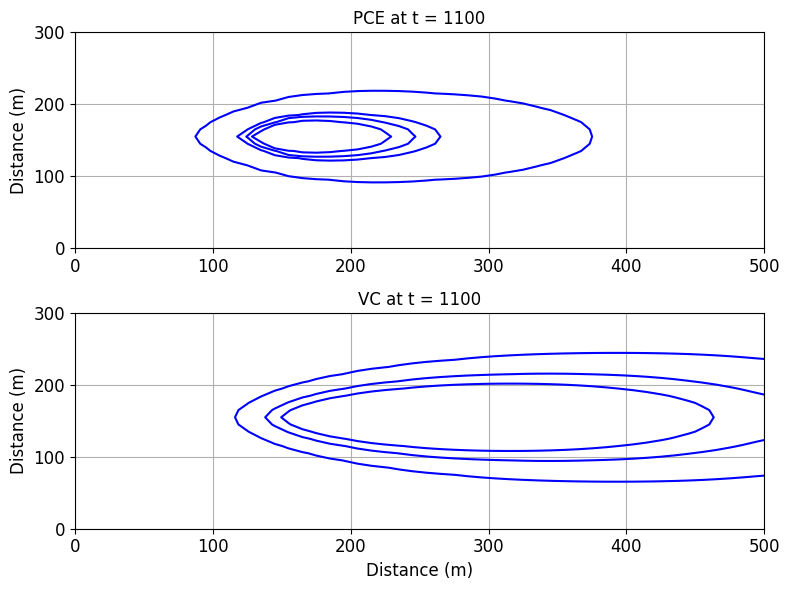

In [1]:
import numpy as np
import matplotlib.pyplot as plt


data = np.load("./output/results.npy").reshape(-1, 4, 31, 51)

PCE = data[:, 0, :, :] * 1000 * 165.8 # shape -> (55, 31, 51)
VC  = data[:, 1, :, :] * 1000 * 62.45
Cl  = data[:, 2, :, :]
Na  = data[:, 3, :, :]

nrow, ncol = 31, 51
ncells = nrow * ncol
dt = 20
ntime = PCE.shape[0]
times = np.arange(0, ntime * dt, dt)

x = np.arange(5, 5 + 10 * ncol, 10)
y = np.arange(5, 5 + 10 * nrow, 10)
X, Y = np.meshgrid(x, y)

levels_PCE = [0.01,   0.5, 1, 2]
levels_VC  = [0.1, 0.5, 1.0]

target_time = 1100
plt.figure(figsize=(8, 6))

for idx, t in enumerate(times):
    if t == target_time:
        plt.clf()

        plt.subplot(2, 1, 1)
        plt.contour(X, Y, PCE[idx], levels_PCE, colors='b')
        plt.axis([0, 500, 0, 300])
        plt.grid(True)
        plt.xticks(fontsize=12)
        plt.yticks([0,100,200,300], fontsize=12)
        plt.ylabel('Distance (m)', fontsize=12)
        plt.title(f'PCE at t = {t}', fontsize=12)

        plt.subplot(2, 1, 2)
        plt.contour(X, Y, VC[idx], levels_VC, colors='b')
        plt.axis([0, 500, 0, 300])
        plt.grid(True)
        plt.xticks(fontsize=12)
        plt.yticks([0,100,200,300], fontsize=12)
        plt.xlabel('Distance (m)', fontsize=12)
        plt.ylabel('Distance (m)', fontsize=12)
        plt.title(f'VC at t = {t}', fontsize=12)

        plt.tight_layout()
        plt.show()
        break
